In [1]:
import pandas as pd

splits = {'train': 'train.parquet', 'test': 'test.parquet'}
df = pd.read_parquet("hf://datasets/scholarly360/indian_ipo_prospectus_data_with_pageno/" + splits["train"])

ValueError: Protocol not known: hf

In [14]:
import pandas as pd
df = pd.read_csv('five_year_ipo_data.csv')
df.shape

(453, 6)

In [15]:
import pandas as pd

df["Delta"] = ((df["Listing Price"] - df["Issue Price"]) / df["Issue Price"]) * 100

print(df.head())

                           Name Listing Date  Issue Price  Listing Price  \
0         Balaji Phosphates Ltd    07-Mar-25           70           75.0   
1  Shreenath Paper Products Ltd    05-Mar-25           44           35.2   
2  Nukleus Office Solutions Ltd    04-Mar-25          234          187.2   
3       Beezaasan Explotech Ltd    03-Mar-25          175          146.0   
4     Swasth Foodtech India Ltd    28-Feb-25           94           94.0   

      LTP  Returns from issue price      Delta  
0   74.35                      6.21   7.142857  
1   30.19                    -31.39 -20.000000  
2  190.00                    -18.80 -20.000000  
3  170.40                     -2.63 -16.571429  
4   80.60                    -14.26   0.000000  


In [70]:
df.shape[0]

453

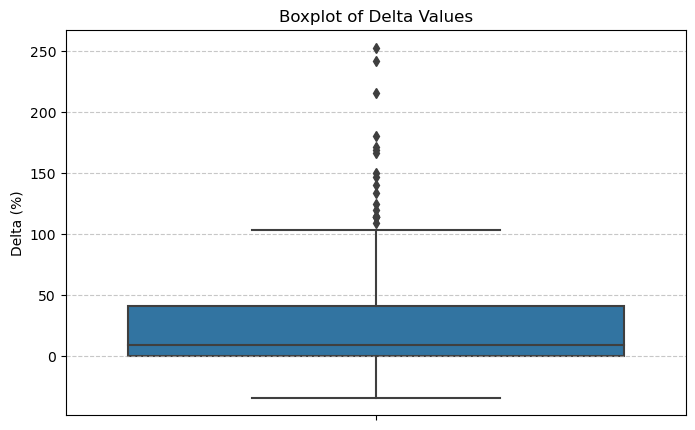

In [72]:
import seaborn as sns

# Boxplot for Delta
fig, ax = plt.subplots(figsize=(8, 5))
sns.boxplot(y=df['Delta'], ax=ax)
plt.ylabel("Delta (%)")
plt.title("Boxplot of Delta Values")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

In [64]:
max(df["Delta"])

252.76073619631902

In [65]:
min(df["Delta"])

-34.0

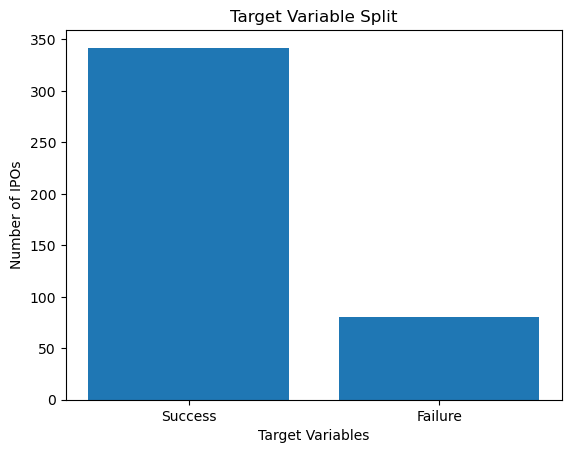

In [73]:
n_s = df[df['Delta']>0].shape[0]
n_f = df[df['Delta']<0].shape[0]

cat = ['Success', 'Failure']
count = [n_s, n_f]

plt.bar(cat, count)
plt.title('Target Variable Split')
plt.xlabel('Target Variables')
plt.ylabel('Number of IPOs')
plt.show()

,Name,Listing Date,Issue Price,Listing Price,LTP,Returns from issue price,Delta
0,Balaji Phosphates Ltd,07-Mar-25,70,75.0,74.35,6.21,7.142857
1,Shreenath Paper Products Ltd,05-Mar-25,44,35.2,30.19,-31.39,-20.000000
2,Nukleus Office Solutions Ltd,04-Mar-25,234,187.2,190.00,-18.80,-20.000000
3,Beezaasan Explotech Ltd,03-Mar-25,175,146.0,170.40,-2.63,-16.571429
4,Swasth Foodtech India Ltd,28-Feb-25,94,94.0,80.60,-14.26,0.000000
...,...,...,...,...,...,...,...
447,Knowledge Marine & Engineering Works Ltd,22-Mar-21,37,38.0,1666.40,4403.78,2.702703
448,Suumaya Corporation Ltd,22-Mar-21,207,211.0,2.36,-98.86,1.932367
449,Easy Trip Planners Ltd,19-Mar-21,187,206.0,12.50,-93.32,10.160428
451,Adjia Technologies Ltd,15-Mar-21,74,74.5,45.10,-39.05,0.675676


In [75]:
thresh = [0,1,2,3,4,5,6,]
#df = df[df['Delta']<70]
s_f = {}
for i in thresh:
    s_f[i] = [df[df['Delta']<-1*i].shape[0], df[df['Delta']>i].shape[0]]

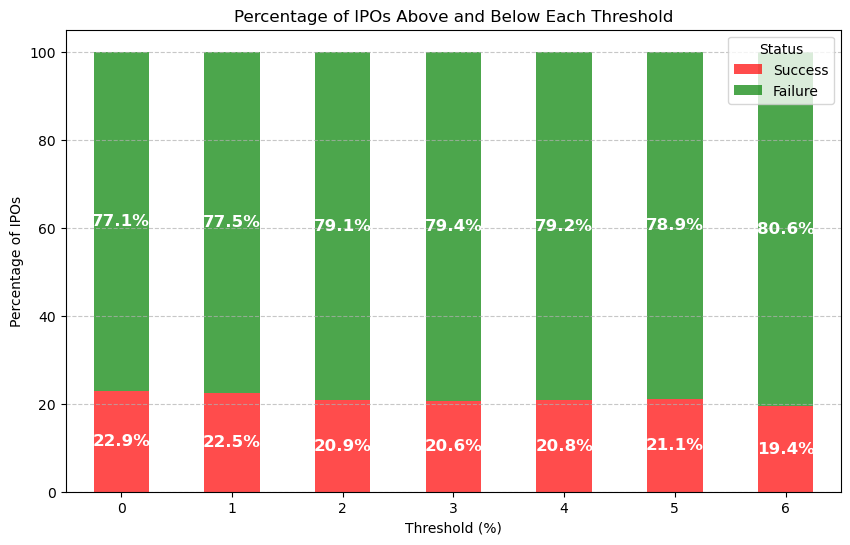

In [79]:
df_plot = pd.DataFrame.from_dict(s_f, orient="index", columns=["Success", "Failure"])

# Convert counts to percentages
df_plot_percent = df_plot.div(df_plot.sum(axis=1), axis=0) * 100

# Plot stacked percentage bar chart
fig, ax = plt.subplots(figsize=(10, 6))
df_plot_percent.plot(kind="bar", stacked=True, color=["red", "green"], alpha=0.7, ax=ax)

# Add percentage text inside bars
for i, (success, failure) in enumerate(zip(df_plot_percent["Success"], df_plot_percent["Failure"])):
    ax.text(i, success / 2, f"{success:.1f}%", ha='center', va='center', color='white', fontsize=12, fontweight='bold')
    ax.text(i, success + failure / 2, f"{failure:.1f}%", ha='center', va='center', color='white', fontsize=12, fontweight='bold')

plt.xlabel("Threshold (%)")
plt.ylabel("Percentage of IPOs")
plt.title("Percentage of IPOs Above and Below Each Threshold")
plt.legend(title="Status")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=0)

plt.show()


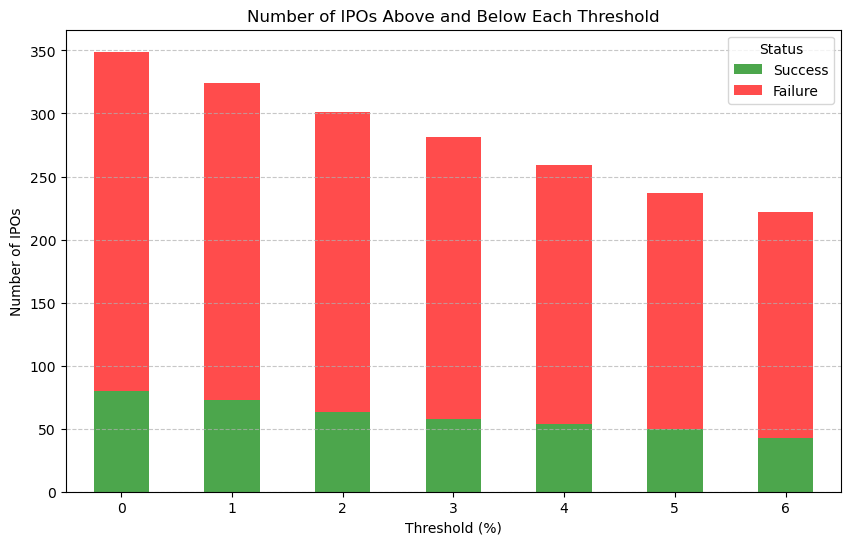

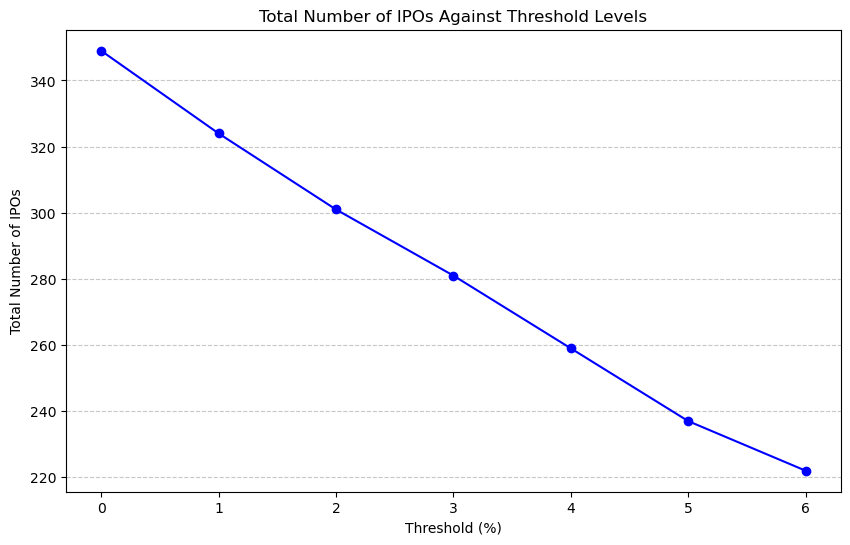

In [78]:
# Convert dictionary to DataFrame
df_plot = pd.DataFrame.from_dict(s_f, orient="index", columns=["Success", "Failure"])

# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
df_plot.plot(kind="bar", stacked=True, color=["green", "red"], alpha=0.7, ax=ax)

plt.xlabel("Threshold (%)")
plt.ylabel("Number of IPOs")
plt.title("Number of IPOs Above and Below Each Threshold")
plt.legend(title="Status")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=0)

# Plot total number of IPOs against thresholds
fig, ax2 = plt.subplots(figsize=(10, 6))
df_plot.sum(axis=1).plot(kind='line', marker='o', color='blue', ax=ax2)

plt.xlabel("Threshold (%)")
plt.ylabel("Total Number of IPOs")
plt.title("Total Number of IPOs Against Threshold Levels")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=0)

plt.show()